In [6]:
%precision 10
import pandas as pd 
from statistical_analysis import statistical_describe as sd 
data = pd.read_csv("../data/boston.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target(MEDV)
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 문제 정의 

집 값이 비싼 지역의 특징은 무엇일까? 

## 데이터 설명 

`CRIM` : 범죄율   
`zn` : 25,000 평방 피트를 초과 거주지역 비율   
`indus` : 비소매상업지역 면적 비율   
`chas` : 찰스 강의 경계에 위치한 경우는 1, 아니면 0   
`nox` : 일산화질소 농도   
`rm` : 주택당 방 수   
`age`: 1940년 이전에 건축된 주택에 비율   
`dis` : 직업센터의 거리   
`rad` : 방사형 고속도로까지의 거리   
`tax` : 재산세율   
`ptratio` : 학생/교사 비율   
`b` : 인구 중 흑인 비율   
`lstat` : 인구 중 하위 계층 비율   
`medv(target)` : 보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위, 1000달러)   


## Feature Selection

`상관계수` 와 `공분산`을 바탕으로 피쳐를 선택하여 봅니다. 

### 가설 1. 범죄율이 높은 곳의 집값은 낮을까? 

일반적인 상식으로는 범죄율이 높다면, 집 값은 낮아야 될 것입니다.   
하지만 데이터를 실제로 살펴보았을 때는, 일반적인 상식과 다른 경우가 나오는 경우가 있기 때문에, 실제로 데이터를 그려본 뒤에 가설을 확인해야 합니다. 

In [4]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target(MEDV)'],
      dtype='object')

## Feature Selection 

`상관계수`와 `공분산`을 바탕으로 피쳐를 선택하여 봅시다

### 가설 1. 범죄율이 높은 곳의 집값은 낮을까? (확인)

일반적인 상식으로는 범죄율이 높다면, 집값은 낮아야됩니다. 

하지만 데이터를 살펴보았을때는 일반적인 상식과 다른 경우가 나오는 데이터가 있을 경우에 실제로 데이터를 그려본 뒤 가설을 확인해봐야 합니다.

In [18]:
del data['CHAS']
# 확신이 있을때만 삭제해야함 

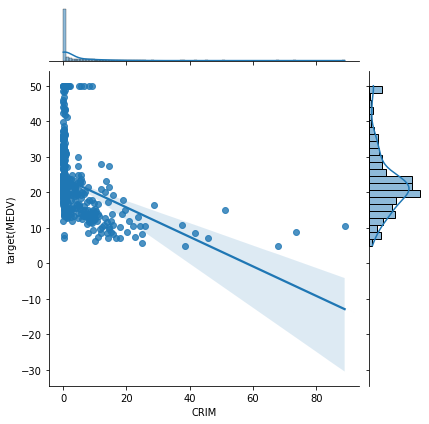

In [10]:
# 실제 집 값과 범죄율 사이의 상관관계가 있는지 확인 
import seaborn as sns 
sns.jointplot(data = data, x= "CRIM", y= "target(MEDV)",kind = "reg")

그림만 봐서는 범죄율이 극단적인 우하향은 아니며 0인 집단 때문에 상관관계때문에 어느정도만 상관관계가 있다는 것을 확인할 수 있을 것 같습니다

`x.cov(y)`  
- 공분산을 확인하기 위한 함수 
- x와 y에 같은 시리즈 형의 데이터를 대입함   
- df.cov()처럼 데이터프레임을 x에 넣고 y자리에 아무것도 적지 않으면 각 변수별로 공분산을 계산하여줌  


In [22]:
# 실제 범죄율과 집 값의 공분산을 확인 
data['CRIM'].cov(data['target(MEDV)'])

-30.71850796445817

서로 음의 방향으로 진행이 된다는 것을 확인할 수 있음 

`x.corr(y)`
- 상관계수를 확인하기 위한 함수 
- x와 y에 같은 시리즈형의 데이터를 대입함 
- df.corr()처럼 데이터프레임을 x에 넣고 y자리에 아무것도 넣지 않으면 각 변수 별로 상관계수를 계산해줌 

In [23]:
data['CRIM'].corr(data['target(MEDV)'])

-0.3883046085868113

### 가설 2. 방의 개수가 많은 곳이 집 값이 비쌀까? (확인)

저의 상식에서는 방의 개수가 늘어나면 늘어날 수록 집 값은 비쌀 것이라고 생각합니다. 이를 데이터를 통해서 확인해 보겠습니다

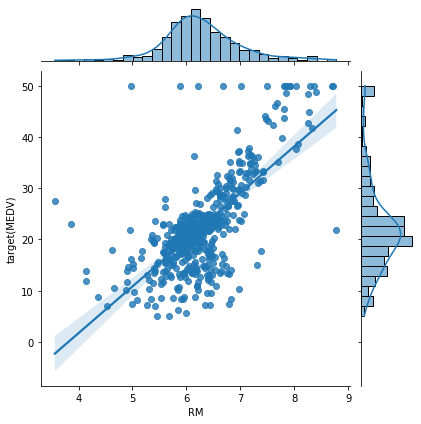

In [11]:
sns.jointplot(data = data , x = "RM", y = "target(MEDV)", kind = "reg")

방의 갯수가 늘어날 수록 집 값이 극단적으로 비싸지는 것을 확인할 수 있습니다  

In [12]:
# 상관 계수 
print("상관 계수는 ",data['RM'].corr(data['target(MEDV)']))
# 공분산 
print("공분산은 ",data['RM'].cov(data['target(MEDV)']))

상관 계수는  0.6953599470715395
공분산은  4.493445879544478


`sns.heatmap`

- 가설을 세울 때, 한 번에 정리를 할 수 있는 방법
- cmap : 전체적인 색을 지정 (summer,YIGnBu/ RdYIGn_r 등)
- annot : True/False로써 숫자를 표현해줄 것인지 기입 
- fmt - 숫자의 소숫점 자리수 설정 

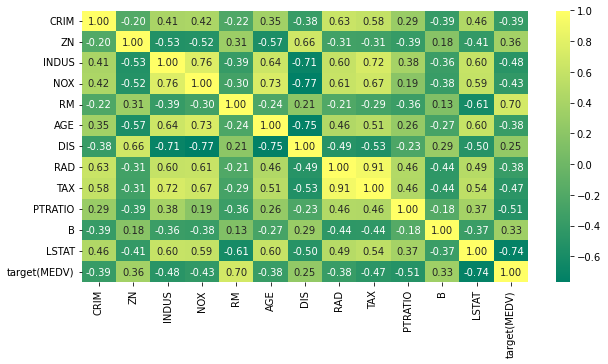

In [36]:
import matplotlib.pyplot as plt 
plt.figure(figsize=[10,5])
sns.heatmap(data.corr(),cmap = "summer",annot = True,fmt = ".2f")
plt.show()

## Feature Extraction

`PCA`를 이용하여 새로운 변수를 만들어보자.

In [61]:
#변수들의 상관계수를 전부 확인하고, 몇 개의 변수를 줄일 것인지 확인해봅시다. 
corr_bar = []

for i in data.columns:
    corr_bar.append((i,abs(data[i].corr(data['target(MEDV)']))))
sorted(corr_bar)

[('AGE', 0.3769545650045963),
 ('B', 0.33346081965706653),
 ('CRIM', 0.3883046085868113),
 ('DIS', 0.24992873408590388),
 ('INDUS', 0.4837251600283727),
 ('LSTAT', 0.7376627261740147),
 ('NOX', 0.42732077237328264),
 ('PTRATIO', 0.5077866855375617),
 ('RAD', 0.38162623063977763),
 ('RM', 0.6953599470715395),
 ('TAX', 0.468535933567767),
 ('ZN', 0.36044534245054277),
 ('target(MEDV)', 1.0)]

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


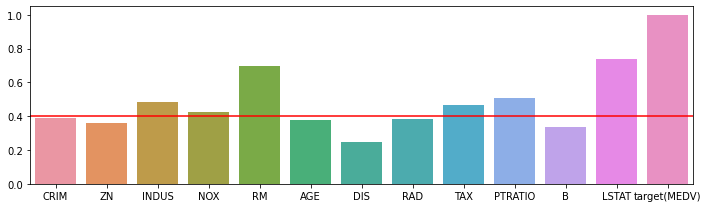

In [67]:
plt.figure(figsize=[10,3])
sns.barplot(data.columns,list(map(lambda x: x[1], corr_bar)))
plt.axhline(y = 0.4, c = "r")
plt.tight_layout()

상관계수가 0.4보다 낮은 Feature들을 대상으로 차원 축소를 진행 

`PCA(n_components)`
- n_components : 몇 가지의 변수를 만들지 개수를 정함   
- 객체를 생성하는 개념  

`PCA.fit(x)`  
- x의 데이터를 학습시킴으로써 앞에서 생성한 객체가 데이터를 공부하는 개념 

`PCA.components_`  
- 앞서 학습한 내용을 바탕으로 만들어진 변수속에 담긴 이 전 변수의 분산이 담김 정도 

`PCA.explained_variance_ratio_`
- 새로운 변수가 설명하는 분산의 비율 

`PCA.transform`
- 학습한 내용을 바탕으로 만들어진 학습기로 x의 데이터를 변환함 


In [71]:
from sklearn.decomposition import PCA 
# 2개의 변수를 조합하여 1개의 변수를 만들어 봅니다 
pca = PCA(n_components=1)
# 데이터를 학습 
pca.fit(data[['DIS','B']])
# 이 전 변수의 분산이 담김 정도 
print(pca.components_)
# -> b의 분산이 크다는 것을 확인 
# -> DIS 의 분산이 거의 담기지 않았고 B의 변수가 99%담긴걸로 확인이 가능함 (-> 정규화가 필요한 이유)
# --> 이러면 2개의 변수를 하나로 바꿨지만 실제로 B만 쓰는 것을 의미함  
# 새로운 변수 PC1이 설명하는 분산의 비율 
print(pca.explained_variance_ratio_)

[[-0.00672682 -0.99997737]]
[0.9995135]


In [72]:
data['pc1'] = pca.transform(data[['DIS','B']])

In [73]:
data.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target(MEDV),pc1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,-40.227042
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,-40.232942
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,-36.163035
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,-37.970360
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,-40.240309


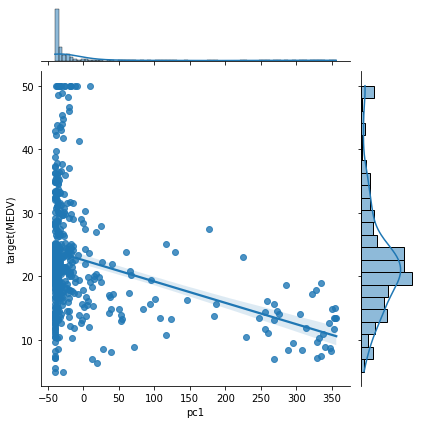

In [74]:
# 새로운 변수와 집 값의 상관관계를 확인해보겠습니다. 
sns.jointplot(data= data, x = "pc1", y= "target(MEDV)",kind = 'reg')

In [75]:
data['pc1'].corr(data['target(MEDV)'])

-0.3334845106741897

흑인과 직장과의 거리 상관성 자체가 크게 변화하지 않음을 확인할 수 있습니다. 

-> 2가지의 변수를 1개로 줄이는 개념자체가 쓸모가 없어집니다 (이는 이전에 흑인의 변수 분산이 너무 많이 담겼기 때문입니다)

이를 해결하기 위해 우리는 정규화를 진행합니다

#### 정규화 

`정규화`를 진행하기 전과 진행한 후의 결과 차이를 보며 정규화를 왜 해야하는지 알아보겠습니다. 

`StandardScaler()`   
- 정규화 객체 생성   

`scaler.fit(x)`
- 정규화 객체로 학습 

`scaler.transform()`
- 학습된 학습기로 변수 x의 데이터를 변환함 

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data[['DIS','B']])
scaled_x = scaler.transform(data[['DIS','B']])

In [80]:
pca = PCA(n_components=1)
data['pc2'] = pca.fit_transform(scaled_x)

In [81]:
print(pca.components_)
print(pca.explained_variance_ratio_)

[[-0.70710678 -0.70710678]]
[0.64575584]


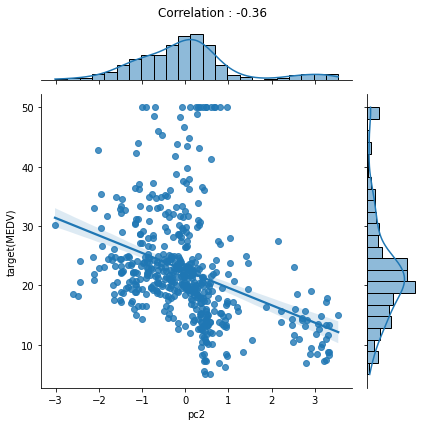

In [85]:
# 새로운 변수와 집 값의 상관관계를 확인해보겠습니다. 
sns.jointplot(data= data, x = "pc2", y= "target(MEDV)",kind = 'reg')
plt.suptitle("Correlation : {:.2f}".format(data['pc2'].corr(data['target(MEDV)'])))
plt.tight_layout()

아까보다 확연하게 상관관계가 잡힌 것을 볼 수 있습니다.

## 군집화

군집화를 통해서 비슷한 성향을 가진 그룹을 찾아보자

In [93]:
data = pd.read_csv("../data/boston.csv")

In [94]:
# 범주형 데이터 제거 
del data['CHAS']

# 나중에 비교를 위한 medv 컬럼도 복사 후 제거를 해둡니다. 
target = data[['target(MEDV)']]
del data['target(MEDV)']
# 군집화를 진행하기에 앞서 수월한 시각화 및 설명력을 첨부하기 위해 PCA를 통해 변수를 2개로 압축해봅니다. 
# 필요 라이브러리를 불러옵니다 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
# 정규화 진행 
scaler = StandardScaler()
scaled_X = scaler.fit_transform(data)

# 객체 생성 및 차원 축소 
pca = PCA(n_components=2)
pca.fit(scaled_X)
composed_data = pca.transform(scaled_X)

In [97]:
df = pd.DataFrame(data = composed_data ,columns = ['PC1','PC2'])

### 몇 개로 군집화를 해야할까? 

- 위의 데이터를 몇 개의 군집화로 나누는 것이 가장 올바른 군집화 방법일까? 


`KMeans(n_cluster = k)` 
- k개의 군집화를 하겠다는 객체 생성 

`KMeans.fit()` 
- 학습시키기  

`KMeans.inertia_` 
- 학습된 KMeans의 응집도를 확인 
- 응집도란 각 데이터로부터 자신이 속한 군집의 중심까지의 거리를 의미함 
- 즉, 낮을수록 군집화가 더 잘되어 있음 

`KMeans.predict(data)` 
- 학습된 데이터를 바탕으로 데이터를 변환시켜줌 

Text(0, 0.5, 'kmeans inertia_')

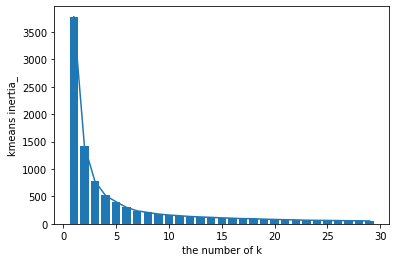

In [103]:
from sklearn.cluster import KMeans 
x = [] # k가 몇개인지 
y = [] # 응집도가 몇인지 

for k in range(1,30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(composed_data)
    x.append(k)
    y.append(kmeans.inertia_)

plt.bar(x = x,height = y)
plt.plot(x,y)
plt.xlabel("the number of k")
plt.ylabel("kmeans inertia_")


#### Elbow point 4 지정 후 클러스터링 시작 

In [110]:
kmeans = KMeans(n_clusters =4)
kmeans.fit(composed_data)

KMeans(n_clusters=4)

In [111]:
df['labels'] = kmeans.predict(composed_data)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

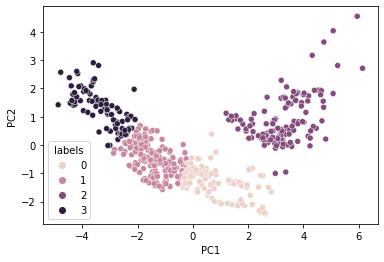

In [116]:
sns.scatterplot(x = "PC1", y = "PC2",hue = "labels", data = df)

#### 클러스터링 결과 해석하기 

pca와 클러스터링을 통해 결과를 해석 

가장 먼저 어떠한 그룹이 집 값이 높은지 평균을 비교합니다

In [117]:
df['medv'] = target
# 시각화를 위해 각 그룹별 medv 값을 따로 변수로 생성함 
medv_0 = df[df['labels']==0]['medv'].mean()
medv_1 = df[df['labels']==1]['medv'].mean()
medv_2 = df[df['labels']==2]['medv'].mean()
medv_3 = df[df['labels']==3]['medv'].mean()

<AxesSubplot:>

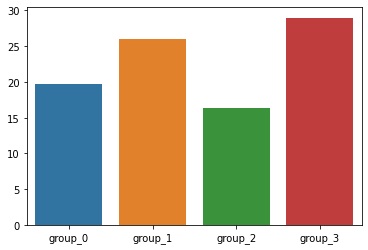

In [119]:
# 주의, 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 "랜덤"임을 잊지 말자 
sns.barplot(x = ['group_0','group_1','group_2','group_3'],y = [medv_0,medv_1,medv_2,medv_3])

#### 그룹들의 트징을 살펴보자 

최상위 그룹과 최하위 그룹의 특징을 살펴보면서 높은 이유 혹은 낮은 이유에 대해서 살펴보겠습니다 

최상위층 : group 3 

최하위층 : group 2 

In [120]:
data['labels'] = df['labels']

In [122]:
# 각 그룹의 데이터를 나눠서 변수에 담숩니다 
group = data[data['labels'].isin([2,3])]

In [126]:
group = group.groupby('labels').mean().reset_index()

In [127]:
group

,labels,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,2,12.571770,0.0000,18.243881,0.671470,6.010679,89.929851,2.05719,23.701493,666.671642,20.198507,288.733209,18.723358
1,3,0.065128,54.1875,3.750909,0.423147,6.722830,29.660227,6.91729,4.159091,305.420455,16.982955,389.006818,6.153409


#### 시각화를 위한 subplot 

`plt.subplots(행,열 , figsize =())` 

여러 가지의 그림을 그리는 방법입니다

In [133]:
group.columns.difference(['labels'])

Index(['AGE', 'B', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD',
       'RM', 'TAX', 'ZN'],
      dtype='object')

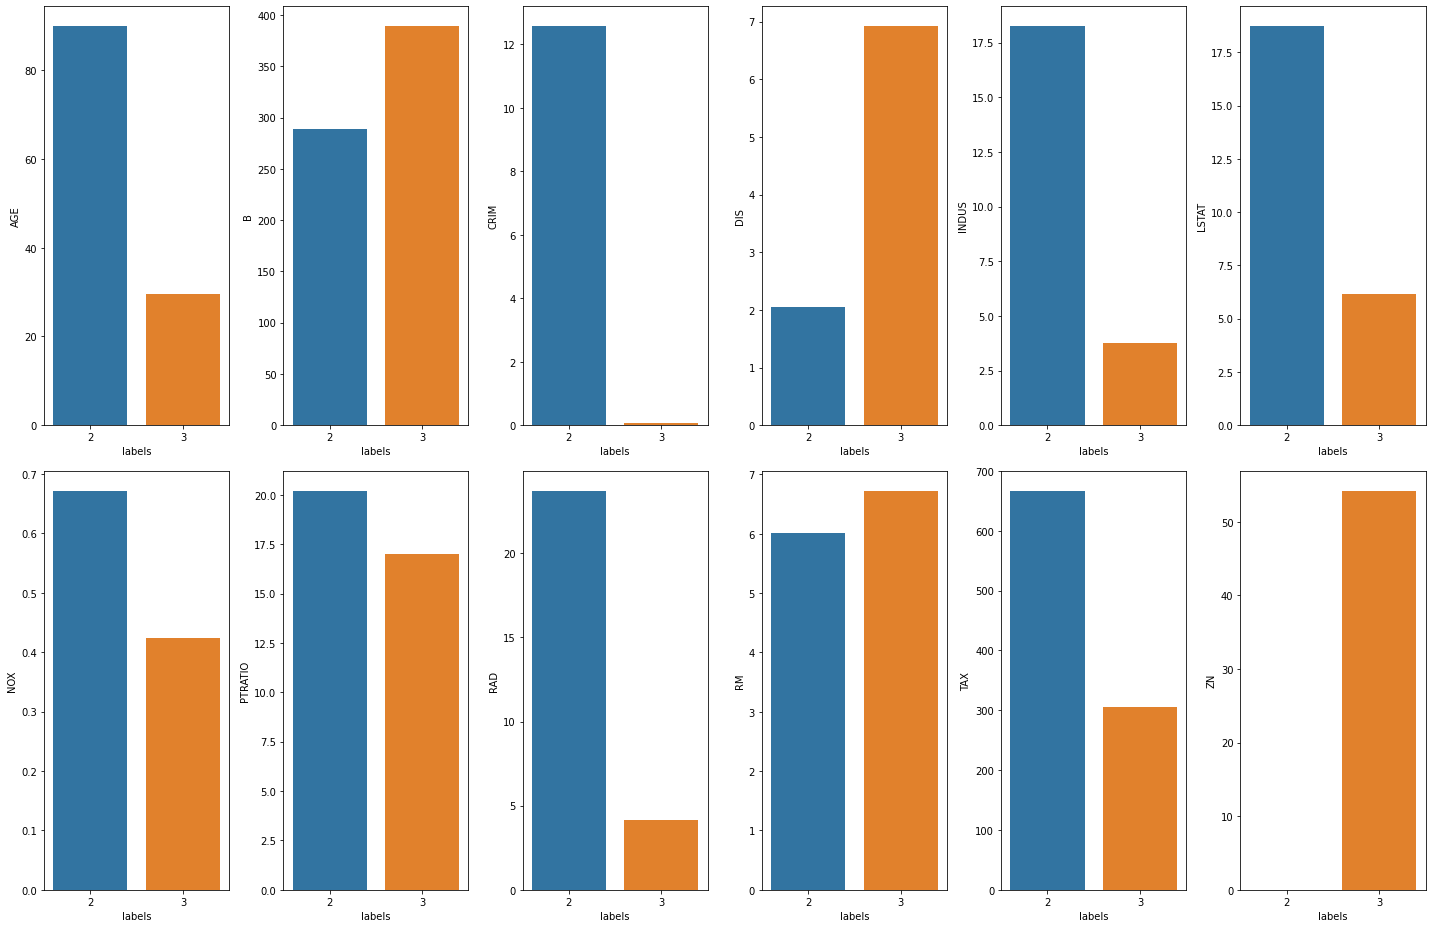

In [135]:
f,ax = plt.subplots(2,6,figsize = [20,13])
idx = 0  
for col in group.columns.difference(['labels']):
    sns.barplot(x = 'labels', y= col, data = group, ax = ax[idx//6,idx%6])
    idx += 1 
plt.tight_layout()

#### 결론 

그래프에서 보이다 싶이 범죄율이 낮을수록, 25,000평방피트를 초과 거주비율이 높을수록 좋은 가격을 나타내는 지역임을 알 수 있습니다. 

또한, 2가지 뿐 아니라 여러가지의 그래프를 보고도 집 값이 높은 지역의 특징을 확인할 수 있습니다. 

radarchart를 이용해서 그래프를 그린다면 더 깔끔한 시각화로 나타낼 수 있을 것입니다,

In [142]:
group

,labels,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,2,12.571770,0.0000,18.243881,0.671470,6.010679,89.929851,2.05719,23.701493,666.671642,20.198507,288.733209,18.723358
1,3,0.065128,54.1875,3.750909,0.423147,6.722830,29.660227,6.91729,4.159091,305.420455,16.982955,389.006818,6.153409


In [143]:
import plotly.graph_objects as go 
import plotly.offline as pyo 

categories = group.columns.difference(['labels','TAX','B'])

grp_2 = group[group['labels']==2][categories].values[0]
grp2 = [*grp_2, grp_2[0]]
grp_3 = group[group['labels']==3][categories].values[0]
grp3 = [*grp_3, grp_3[0]]

In [144]:
fig = go.Figure(
    data = [
        go.Scatterpolar(r = grp2, theta = categories,fill= 'toself', name = "Group 2"),
        go.Scatterpolar(r = grp3, theta = categories,fill= 'toself', name = "Group 3")
    ],
    layout = go.Layout(
        title = go.layout.Title(text = "Group comparison"),
        polar = {'radialaxis': {'visible': True}},
        showlegend = True
    )
)

pyo.plot(fig)

'temp-plot.html'

조금 더 잘보이긴 하지만, 변수간 scale이 맞지 않아서 제대로 해석이 불가능함 -> scaled된 데이터로 보면 훨씬 괜찮을 걳 

kmeans 결과 활용 방법 

1. 라벨 인코딩 
> 머신러닝을 학습시키기 위해서는 숫자가 아닌 단어, 혹은 문자열을 숫자로 바꿔 줘야만 학습이 가능함   
> 라벨 인코딩은 문자열을 카테고리별로 적용시키는 인코딩 방식입니다. 

2. 원핫 인코딩   
> 문자열을 숫자로 바꾼다는 점은 라벨 인코딩과 같지만 원 핫 인코딩은 문자열을 카테고리 별로 바꾸는 것이 아닌 0과 1만 소유할 수 있는 테이블을 만들어 해당 되는 데이터만 1로 표시 남은 데이터는 0으로 채우는 인코딩 방식입니다